# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key
#!pip install citipy
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [32]:

from tkinter import UNITS


url = "http://api.openweathermap.org/data/2.5/weather?" 
units="metric"
query_url=query_url = f"{url}appid={weather_api_key}&units={units}&q="
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        city_temp=city_weather["main"]["temp"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | neuruppin
Processing Record 3 of Set 1 | mercedes
Processing Record 4 of Set 1 | victoria
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | bonavista
Processing Record 8 of Set 1 | bardiyah
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | cockburn town
Processing Record 13 of Set 1 | caravelas
Processing Record 14 of Set 1 | bambous virieux
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | fiumicino
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | mount isa
Processing Record 21 of Set 1 | wagar
Processing Record 22 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
city_data_df=pd.DataFrame(city_data)

In [34]:
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lompoc,34.6391,-120.4579,23.34,83,94,0.61,US,1662879412
1,neuruppin,52.9282,12.8031,14.49,88,23,3.01,DE,1662879412
2,mercedes,-34.6515,-59.4307,6.69,56,0,3.18,AR,1662879412
3,victoria,22.2855,114.1577,35.66,55,7,4.55,HK,1662879215
4,ribeira grande,38.5167,-28.7000,22.22,78,40,11.32,PT,1662879413
5,new norfolk,-42.7826,147.0587,10.72,75,10,3.13,AU,1662879413
6,bonavista,48.6499,-53.1147,14.42,96,100,15.45,CA,1662879413
7,bardiyah,31.7561,25.0865,27.25,67,0,5.98,LY,1662879413
8,georgetown,5.4112,100.3354,29.97,71,40,2.24,MY,1662879133
9,jamestown,42.0970,-79.2353,18.73,69,100,0.45,US,1662879414


In [36]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        560 non-null    object 
 1   Lat         560 non-null    float64
 2   Lng         560 non-null    float64
 3   Max Temp    560 non-null    float64
 4   Humidity    560 non-null    int64  
 5   Cloudiness  560 non-null    int64  
 6   Wind Speed  560 non-null    float64
 7   Country     560 non-null    object 
 8   Date        560 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 39.5+ KB


In [10]:
city_data_df.to_csv("cityweather_Output.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [37]:
#  Get the indices of cities that have humidity over 100%.


high_humidity_data = city_data_df[(city_data_df["Humidity"] > 100)].index
                                  
high_humidity_data

Int64Index([], dtype='int64')

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [38]:
clean_city_data = city_data_df.drop(high_humidity_data, inplace=False)
clean_city_data.head(20)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lompoc,34.6391,-120.4579,23.34,83,94,0.61,US,1662879412
1,neuruppin,52.9282,12.8031,14.49,88,23,3.01,DE,1662879412
2,mercedes,-34.6515,-59.4307,6.69,56,0,3.18,AR,1662879412
3,victoria,22.2855,114.1577,35.66,55,7,4.55,HK,1662879215
4,ribeira grande,38.5167,-28.7000,22.22,78,40,11.32,PT,1662879413
5,new norfolk,-42.7826,147.0587,10.72,75,10,3.13,AU,1662879413
6,bonavista,48.6499,-53.1147,14.42,96,100,15.45,CA,1662879413
7,bardiyah,31.7561,25.0865,27.25,67,0,5.98,LY,1662879413
8,georgetown,5.4112,100.3354,29.97,71,40,2.24,MY,1662879133
9,jamestown,42.0970,-79.2353,18.73,69,100,0.45,US,1662879414


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs Temperature')

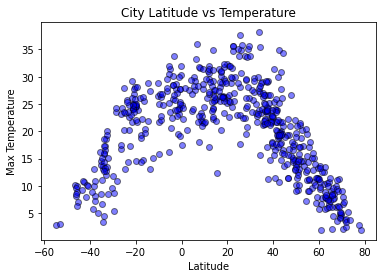

In [40]:

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolors="blue", edgecolors="black", alpha = 0.5)


plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude vs Temperature")
#print("The plot shows that there is no real pattern that can describe the relationship between latitude and humidity")


## Latitude vs. Humidity Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and humidity


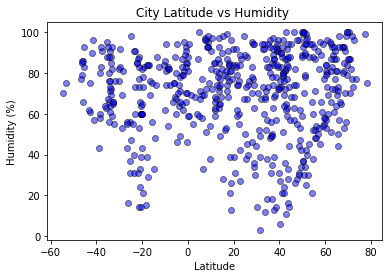

In [41]:

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolors="blue", edgecolors="black", alpha = 0.5)

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity ")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and humidity")

## Latitude vs. Cloudiness Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and humidity


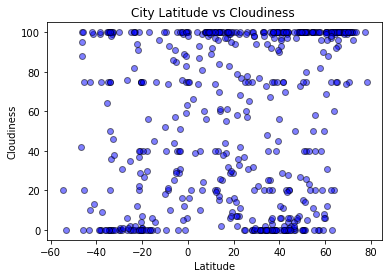

In [42]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolors="blue", edgecolors="black", alpha = 0.5)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness ")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and humidity")

## Latitude vs. Wind Speed Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and humidity


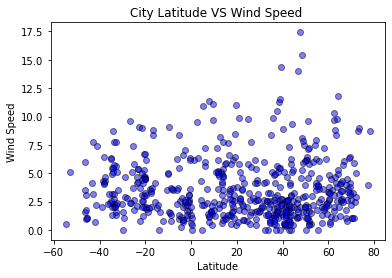

In [43]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolors="blue", edgecolors="black", alpha = 0.5)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude VS Wind Speed ")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and humidity")

## Linear Regression

In [47]:
nor_hemisphere_data = city_data_df.loc[city_data_df["Lat"] > 0,:]
nor_hemisphere_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lompoc,34.6391,-120.4579,23.34,83,94,0.61,US,1662879412
1,neuruppin,52.9282,12.8031,14.49,88,23,3.01,DE,1662879412
3,victoria,22.2855,114.1577,35.66,55,7,4.55,HK,1662879215
4,ribeira grande,38.5167,-28.7000,22.22,78,40,11.32,PT,1662879413
6,bonavista,48.6499,-53.1147,14.42,96,100,15.45,CA,1662879413
...,...,...,...,...,...,...,...,...,...
551,yamada,39.4667,141.9500,22.74,72,91,2.19,JP,1662879602
553,skjervoy,70.0311,20.9714,9.00,87,100,2.65,NO,1662879613
555,gleisdorf,47.1061,15.7127,16.74,74,97,1.13,AT,1662879617
557,bacolod,10.6667,122.9500,29.59,72,92,5.09,PH,1662879403


In [54]:
sou_hemisphere_data = city_data_df.loc[city_data_df["Lat"] < 0,:]
sou_hemisphere_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,mercedes,-34.6515,-59.4307,6.69,56,0,3.18,AR,1662879412
5,new norfolk,-42.7826,147.0587,10.72,75,10,3.13,AU,1662879413
10,mataura,-46.1927,168.8643,8.19,79,100,1.60,NZ,1662879415
12,caravelas,-17.7125,-39.2481,19.28,84,30,3.22,BR,1662879415
13,bambous virieux,-20.3428,57.7575,24.56,60,75,4.63,MU,1662879415
...,...,...,...,...,...,...,...,...,...
546,tsabong,-26.0217,22.4010,24.22,16,1,5.15,BW,1662879599
552,itaituba,-4.2761,-55.9836,22.42,70,0,0.23,BR,1662879604
554,belmonte,-15.8631,-38.8828,19.69,75,6,2.47,BR,1662879616
556,dolores,-36.3132,-57.6792,5.07,64,0,2.25,AR,1662879623


###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6496769942882611


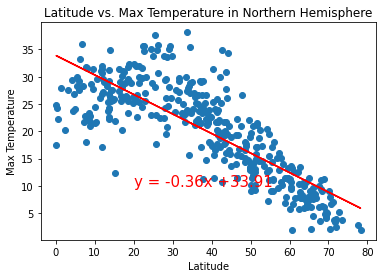

In [53]:
x_values = nor_hemisphere_data["Lat"]
y_values = nor_hemisphere_data["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Latitude vs. Max Temperature in Northern Hemisphere')
plt.annotate(line_eq,(20,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6297396770683372


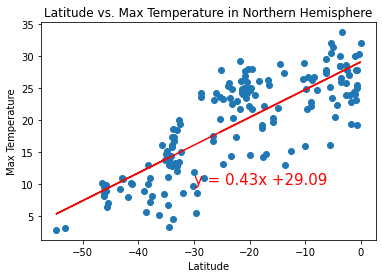

In [57]:
x_values = sou_hemisphere_data["Lat"]
y_values = sou_hemisphere_data["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Latitude vs. Max Temperature in Southern Hemisphere')
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot

plt.show()

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0024316182554478347


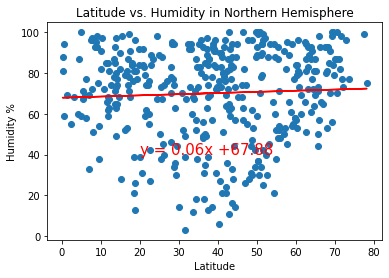

In [59]:
x_values = nor_hemisphere_data["Lat"]
y_values = nor_hemisphere_data["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel(f'Humidity %')
plt.title('Latitude vs. Humidity in Northern Hemisphere')
plt.annotate(line_eq,(20,40),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0007110615625324826


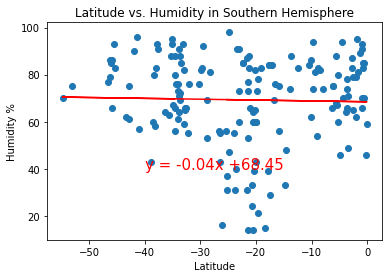

In [62]:
x_values = sou_hemisphere_data["Lat"]
y_values = sou_hemisphere_data["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel(f'Humidity %')
plt.title('Latitude vs. Humidity in Southern Hemisphere')
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot

plt.show()

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.012837222206618976


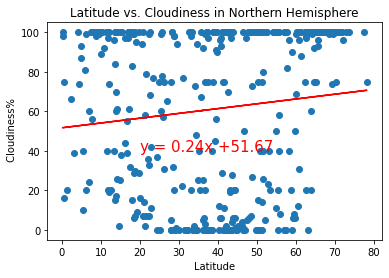

In [63]:
x_values = nor_hemisphere_data["Lat"]
y_values = nor_hemisphere_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel(f' Cloudiness%')
plt.title('Latitude vs. Cloudiness in Northern Hemisphere')
plt.annotate(line_eq,(20,40),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0038725551936620115


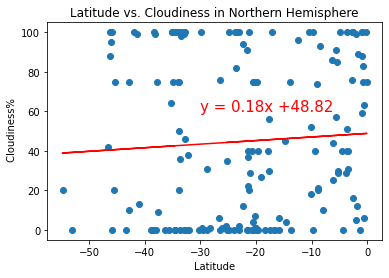

In [66]:
x_values = sou_hemisphere_data["Lat"]
y_values = sou_hemisphere_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel(f' Cloudiness%')
plt.title('Latitude vs. Cloudiness in Southern Hemisphere')
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot

plt.show()

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0014595063239969716


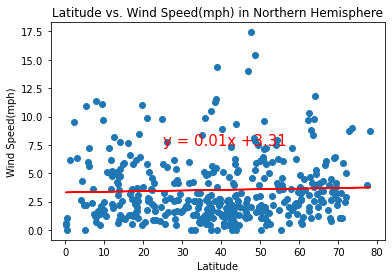

In [68]:
x_values = nor_hemisphere_data["Lat"]
y_values = nor_hemisphere_data["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel(f'Wind Speed(mph)')
plt.title('Latitude vs. Wind Speed(mph) in Northern Hemisphere')
plt.annotate(line_eq,(25,7.5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.010487567912869252


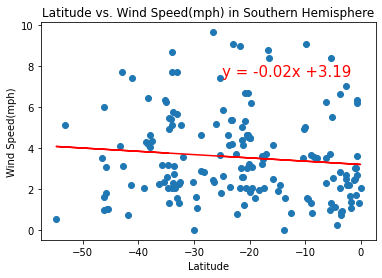

In [69]:
x_values = sou_hemisphere_data["Lat"]
y_values = sou_hemisphere_data["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel(f'Wind Speed(mph)')
plt.title('Latitude vs. Wind Speed(mph) in Southern Hemisphere')
plt.annotate(line_eq,(-25,7.5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot

plt.show()